<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [20]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [5]:
# Answer: 979 rows and 6 columns
movies.shape

(979, 6)

#### Check the data type of each column.

In [6]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [7]:
# Answer: 121 minutes in duration
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [8]:
# Answer: Longest is 242minutes and shortest is 64minutes
movies.sort_values(by='duration',ascending=True).head(5)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."


In [9]:
movies.sort_values(by='duration',ascending=True).tail(5)

,star_rating,title,content_rating,genre,duration,actors_list
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

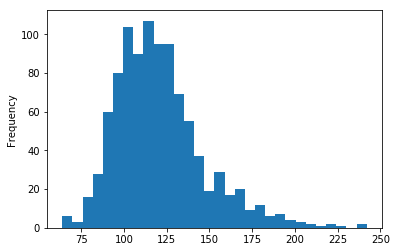

In [10]:
# Answer: 
movies.duration.plot.hist(bins=30)

#### Use a box plot to display that same data.

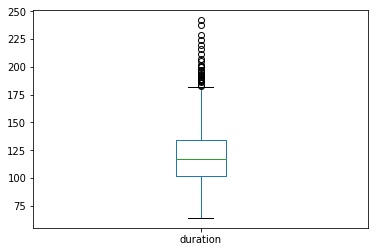

In [11]:
# Answer:
movies.duration.plot.box()

## Intermediate level

#### Count how many movies have each of the content ratings.

In [12]:
# Answer:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0, 0.5, 'Count')

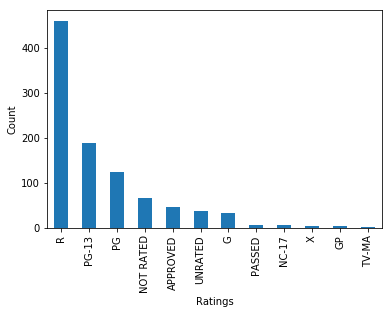

In [13]:
movies['content_rating'].value_counts().plot.bar()
plt.xlabel('Ratings')
plt.ylabel('Count')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [14]:
# Answer:
def rating_conversion(rating):
    # this maps the original color to the color we want it to be
    rating_dict = {'NOT RATED': 'UNRATED','APPROVED': 'UNRATED','PASSED': 'UNRATED','GP': 'UNRATED'}
    try:
        return rating_dict[rating]
    
    except KeyError:
        return rating
    
movies['content_rating'].apply(rating_conversion).head(20)

0           R
1           R
2           R
3       PG-13
4           R
5     UNRATED
6     UNRATED
7       PG-13
8           R
9           R
10      PG-13
11      PG-13
12         PG
13      PG-13
14      PG-13
15      PG-13
16          R
17    UNRATED
18          R
19         PG
Name: content_rating, dtype: object

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [15]:
# Answer:
def rating_conversion(rating):
    # this maps the original color to the color we want it to be
    rating_dict = {'NOT RATED': 'UNRATED','APPROVED': 'UNRATED','PASSED': 'UNRATED','GP': 'UNRATED', 'X':'NC-17', 'TV-MA':'NC-17'}
    try:
        return rating_dict[rating]
    
    except KeyError:
        return rating
    
movies['content_rating'].apply(rating_conversion)

0            R
1            R
2            R
3        PG-13
4            R
5      UNRATED
6      UNRATED
7        PG-13
8            R
9            R
10       PG-13
11       PG-13
12          PG
13       PG-13
14       PG-13
15       PG-13
16           R
17     UNRATED
18           R
19          PG
20           R
21           R
22     UNRATED
23           R
24           R
25       PG-13
26       PG-13
27           R
28           R
29     UNRATED
        ...   
949         PG
950          R
951          R
952          R
953         PG
954      PG-13
955          R
956         PG
957          R
958      PG-13
959          R
960      PG-13
961          R
962         PG
963          R
964      PG-13
965      PG-13
966      PG-13
967          R
968          R
969          R
970          R
971          R
972      NC-17
973      PG-13
974         PG
975         PG
976      PG-13
977         PG
978          R
Name: content_rating, Length: 979, dtype: object

#### Count the number of missing values in each column.

In [16]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [35]:
null_df = pd.DataFrame(movies.isnull().sum(), columns=['Count of Nulls'])
null_df.index.name = 'Column'
null_df.sort_values(['Count of Nulls'], ascending=False).head(10)

,Count of Nulls
Column,
content_rating,3
star_rating,0
title,0
genre,0
duration,0
actors_list,0


#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [41]:
# Answer:
movies['content_rating'].value_counts(dropna=False)

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
NaN            3
TV-MA          1
Name: content_rating, dtype: int64

In [47]:
movies.fillna(value={'content_rating':'NOT RATED'}, inplace=True)
movies['content_rating'].value_counts(dropna=False)

R            460
PG-13        189
PG           123
NOT RATED     68
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [71]:
long_movies=movies[(movies['duration'] > 120)]
short_movies=movies[(movies['duration'] <= 120)]
print(short_movies['star_rating'].mean())
print(long_movies['star_rating'].mean())

7.8384898710865345
7.953669724770622


#### Use a visualization to detect whether there is a relationship between duration and star rating.

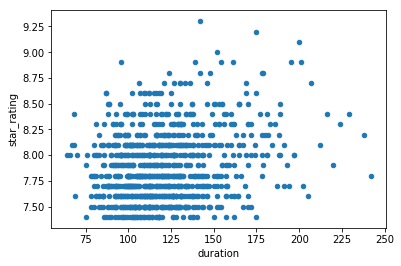

In [72]:
# Answer:
movies.plot.scatter(x='duration',y='star_rating')

#### Calculate the average duration for each genre.

In [80]:
# Answer:
movies[['genre','duration']].groupby('genre').mean().sort_values('duration', ascending=False)

Column,duration
genre,
Western,136.666667
Adventure,134.840000
Biography,131.844156
Drama,126.539568
Action,126.485294
Crime,122.298387
Mystery,115.625000
Thriller,114.200000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

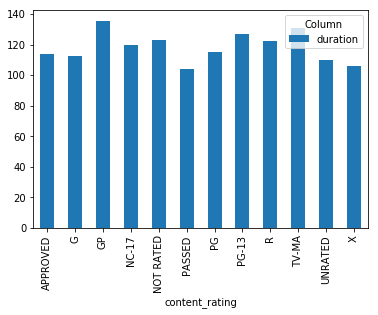

In [87]:
# Answer:
movies[['content_rating','duration']].groupby('content_rating').mean().plot(kind='bar');

#### Determine the top rated movie (by star rating) for each genre.

In [89]:
# Answer:
movies[['genre','star_rating','title']].groupby('genre').max()

Column,star_rating,title
genre,,
Action,9.0,Yojimbo
Adventure,8.9,True Grit
Animation,8.6,Wreck-It Ralph
Biography,8.9,Walk the Line
Comedy,8.6,Zombieland
Crime,9.3,Zodiac
Drama,8.9,Zulu
Family,7.9,Willy Wonka & the Chocolate Factory
Fantasy,7.7,The City of Lost Children


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [149]:
title_count=movies.title.value_counts()
duplicate_title=title_count[title_count>=2].index
movies[movies.title.isin(duplicate_title)].sort_values('title')

Column,star_rating,title,content_rating,genre,duration,actors_list,dup_title
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma...",NaN
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",NaN
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat...",NaN
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",NaN
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe...",NaN
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",NaN
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...",NaN
936,7.4,True Grit,NOT RATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",NaN


In [140]:
# Answer:
#get count of movie titles and sort so that duplicates are at the top
movies['title'].value_counts(dropna=True).sort_values(ascending=False)
# Make new collumn in movies data frame with that count
movies['dup_title']=((movies['title'].value_counts(dropna=True)),index= movies['title'])
#filter data frame by that new collumn and see first 8 rows
movies[(movies['dup_title']>1)].head(8)

SyntaxError: invalid syntax (<ipython-input-140-5e9daaec5cab>, line 5)

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [155]:
# Answer:
genre_count=movies.genre.value_counts()
genre_criteria=genre_count[genre_count>=10].index
(movies[movies.genre.isin(genre_criteria)].groupby('genre').star_rating.mean()).sort_values(ascending=False)

genre
Mystery      7.975000
Adventure    7.933333
Crime        7.916935
Animation    7.914516
Drama        7.902518
Action       7.884559
Biography    7.862338
Comedy       7.822436
Horror       7.806897
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!